# LCT GPT Prompt Experimentation

## Installation

Clone the github repository and install the requirements

In [ ]:
# It is recommended to setup a Python or conda virtual environment before running this notebook
# A conda/mamba environment file is provided in the repository

# Alternatively if libraries not installed yet, uncomment and run the following:
#!pip install -r ../requirements.txt

In [1]:
# import libraries
import os
import sys
import json
import random
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import panel as pn
#from itables import init_notebook_mode

# Add local libraries in tools/
sys.path.insert(1, '../tools')
import experiment as ex
from load_schema_json import load_json, validate_json, json_to_dataframe
from utils_llm import LLM, openai_apikey_input
from excel_json_converter import excel_to_json

# open notebook in interactive mode
#init_notebook_mode(all_interactive=True)

## Schema and data

Define locations of files for sequencing types, instruction prompts, and examples.

In [2]:
# output path:
outpath = "../results/"

# root path:
path_schema = "../schemas/"

# filename for examples (either .json or .xlsx):
filename_examples = "sequencing_examples_2clauses.xlsx"
#filename_examples = "sequencing_examples_reason.json"

# filename for sequencing definitions (either .json or .xlsx):
filename_definitions = "sequencing_types.xlsx"
#filename_definitions = "sequencing_types.json"

# filename for instructions
filename_zero_prompt = "instruction_prompt.txt"

# filename for json schema
filename_schema = "schema_sequencing_examples_reason.json"

# if you want to select manually examples from the example table (filename_examples ), select indices here as list
# Preferentially you want to select one example per sequencing type
# Note that indices count start with 0
# Alternatively set None or empty list. In this case a random selection of examples will be used

list_prompt_indices = [0,1,7,14,23,26,30,33]
#list_prompt_indices = None


### Pre-process: convert any excel files to json beforehand

In [3]:
# Check if filename_examples is excel file
if filename_examples.endswith(".xlsx"):
    # convert filename_examples to json
    json_filename_out = filename_examples.replace(".xlsx", "_converted.json")
    excel_to_json(os.path.join(path_schema, filename_examples), 
                  os.path.join(path_schema, json_filename_out))
    filename_examples = json_filename_out

# Check if filename_definitions is excel file
if filename_definitions.endswith(".xlsx"):
    # convert filename_definitions to json
    json_filename_out = filename_definitions.replace(".xlsx", "_converted.json")
    excel_to_json(os.path.join(path_schema, filename_definitions), 
                  os.path.join(path_schema, json_filename_out))
    filename_definitions = json_filename_out

## OpenAI Authentication

In [4]:
# Authentication with OpenAI API key for GPT usage
# initialize token_counter
token_count = 0

# set modelname
modelname_llm = 'gpt-3.5-turbo-instruct'

# set openAI authentication
openai_apikey_input()

Row
    [0] PasswordInput(name='Enter your OpenAI A..., placeholder='<OpenAI API Key>')
    [1] Markdown(str)

## Run Experiment pipeline

This experiment pipeline includes the following main steps:
- load examples from json file
- split examples in train and test samples
- generate prompt string
- call OpenAI API
- save prompt and response to file
- save results to csv file
- evaluate results

In [5]:
df_results, outpath_exp, seq_classes = ex.run_pipe(
        outpath = outpath, 
        path_schema = path_schema, 
        filename_examples = filename_examples, 
        filename_schema = filename_schema, 
        filename_definitions = filename_definitions, 
        filename_zero_prompt = filename_zero_prompt, 
        modelname_llm = modelname_llm,
        list_prompt_indices = list_prompt_indices)

LLM initialized with API key from file: ../../openai_key.txt
Test sample 0 of 26
Test class: Consequential Sequencing | Prediction: INC | Probability: 0.576 | Used tokens: 3364 
Test sample 1 of 26
Test class: Consequential Sequencing | Prediction: CON | Probability: 0.477 | Used tokens: 3401 
Test sample 2 of 26
Test class: Consequential Sequencing | Prediction: CON | Probability: 0.746 | Used tokens: 3327 
Test sample 3 of 26
Test class: Consequential Sequencing | Prediction: CON | Probability: 0.597 | Used tokens: 3339 
Test sample 4 of 26
Test class: Consequential Sequencing | Prediction: CON | Probability: 0.454 | Used tokens: 3362 
Test sample 5 of 26
Test class: Consequential Sequencing | Prediction: CON | Probability: 0.921 | Used tokens: 3336 
Test sample 6 of 26
Test class: Sequential Sequencing | Prediction: SEQ | Probability: 0.969 | Used tokens: 3302 
Test sample 7 of 26
Test class: Sequential Sequencing | Prediction: SEQ | Probability: 0.951 | Used tokens: 3295 
Test samp

### Show results table for all samples

In [6]:
# show results table interactively
df_results

,test_str,test_chunk1,test_chunk2,test_class,test_linkage,pred_class,pred_class_prob,pred_linkage,prompt_id,filename_prompt,filename_response,tokens,modelname_llm,reasoning
0,"Do, you know, are the themes of their artwork ...","Do, you know, are the themes of their artwork ...","So it’s saying remember when we started, we s...",Consequential Sequencing,None,INC,0.575693,None,cmpl-8CfQzBd7Njp3fPd6zRvlRQHa3D4uN,prompt_cmpl-8CfQzBd7Njp3fPd6zRvlRQHa3D4uN.txt,response_cmpl-8CfQzBd7Njp3fPd6zRvlRQHa3D4uN.txt,3364,gpt-3.5-turbo-instruct,The example is incoherent because the two clau...
1,High-Density lipoprotein (hdl) protects the ar...,High-Density lipoprotein (hdl) protects the ar...,"However, recent evidence suggests that hdl mi...",Consequential Sequencing,None,CON,0.476675,However,cmpl-8CfR1fm1TDX9Ga6BgkT1fjhlPE1Ib,prompt_cmpl-8CfR1fm1TDX9Ga6BgkT1fjhlPE1Ib.txt,response_cmpl-8CfR1fm1TDX9Ga6BgkT1fjhlPE1Ib.txt,3401,gpt-3.5-turbo-instruct,The example establishes a cause-and-effect rel...
2,"if we look at where Italy is, it’s not that fa...","if we look at where Italy is,",it’s not that far from Egypt at this time,Consequential Sequencing,None,CON,0.745544,None,cmpl-8CfR3KoIao6xtJG5LdaDYQQkeAVLz,prompt_cmpl-8CfR3KoIao6xtJG5LdaDYQQkeAVLz.txt,response_cmpl-8CfR3KoIao6xtJG5LdaDYQQkeAVLz.txt,3327,gpt-3.5-turbo-instruct,The example establishes a cause-and-effect rel...
3,"It doesn’t always have to be eight, but atoms ...",It doesn’t always have to be eight,but atoms would like to have eight.,Consequential Sequencing,None,CON,0.596861,None,cmpl-8CfR521nnwKWhc7jh7uRteT1gVJBp,prompt_cmpl-8CfR521nnwKWhc7jh7uRteT1gVJBp.txt,response_cmpl-8CfR521nnwKWhc7jh7uRteT1gVJBp.txt,3339,gpt-3.5-turbo-instruct,The example establishes a cause-and-effect rel...
4,To identify potential anti-inflammatory mechan...,To identify potential anti-inflammatory mechan...,we challenged macrophages with lipopolysacchar...,Consequential Sequencing,None,CON,0.454232,None,cmpl-8CfR7Jskrpdo5s7N3JotbFaVIWvLq,prompt_cmpl-8CfR7Jskrpdo5s7N3JotbFaVIWvLq.txt,response_cmpl-8CfR7Jskrpdo5s7N3JotbFaVIWvLq.txt,3362,gpt-3.5-turbo-instruct,The example establishes a cause-and-effect rel...
5,"If you are disappointed with the number, then ...","If you are disappointed with the number,",then it means you probably could have tried a...,Consequential Sequencing,None,CON,0.921230,None,cmpl-8CfR9zqKYffQ9EokIYz5tl7ng9V0m,prompt_cmpl-8CfR9zqKYffQ9EokIYz5tl7ng9V0m.txt,response_cmpl-8CfR9zqKYffQ9EokIYz5tl7ng9V0m.txt,3336,gpt-3.5-turbo-instruct,The example establishes a cause-and-effect rel...
6,You have to read it and then you’re asked some...,You have to read it,and then you’re asked some questions,Sequential Sequencing,None,SEQ,0.969028,None,cmpl-8CfRAoMOkqJR3cqxw7PC9Kr7IknFm,prompt_cmpl-8CfRAoMOkqJR3cqxw7PC9Kr7IknFm.txt,response_cmpl-8CfRAoMOkqJR3cqxw7PC9Kr7IknFm.txt,3302,gpt-3.5-turbo-instruct,The example presents a clear sequence of event...
7,The corn is fried and then added to the mix.,The corn is fried,and then added to the mix.,Sequential Sequencing,None,SEQ,0.951038,None,cmpl-8CfRCil6el6staC8lefYOXWCaR4nx,prompt_cmpl-8CfRCil6el6staC8lefYOXWCaR4nx.txt,response_cmpl-8CfRCil6el6staC8lefYOXWCaR4nx.txt,3295,gpt-3.5-turbo-instruct,The example presents a clear sequence of event...
8,Place the potatoes in the oven. Bake for thirt...,Place the potatoes in the oven.,Bake for thirty minutes.,Sequential Sequencing,None,SEQ,0.966658,None,cmpl-8CfRD5UlEjjjYZbzUI0MOz2PDMgG7,prompt_cmpl-8CfRD5UlEjjjYZbzUI0MOz2PDMgG7.txt,response_cmpl-8CfRD5UlEjjjYZbzUI0MOz2PDMgG7.txt,3312,gpt-3.5-turbo-instruct,The example presents a clear sequence of event...
9,he worked late at night before sleeping in unt...,he worked late at night,before sleeping in until lunchtime,Sequential Sequencing,None,SEQ,0.920886,before,cmpl-8CfRFfZHwZlBl3HvGsInqzBg3NY9x,prompt_cmpl-8CfRFfZHwZlBl3HvGsInqzBg3NY9x.txt,response_cmpl-8CfRFfZHwZlBl3HvGsInqzBg3NY9x.txt,3292,gpt-3.5-turbo-instruct,The example presents a clear temporal sequence...


### Evaluate and print results stats

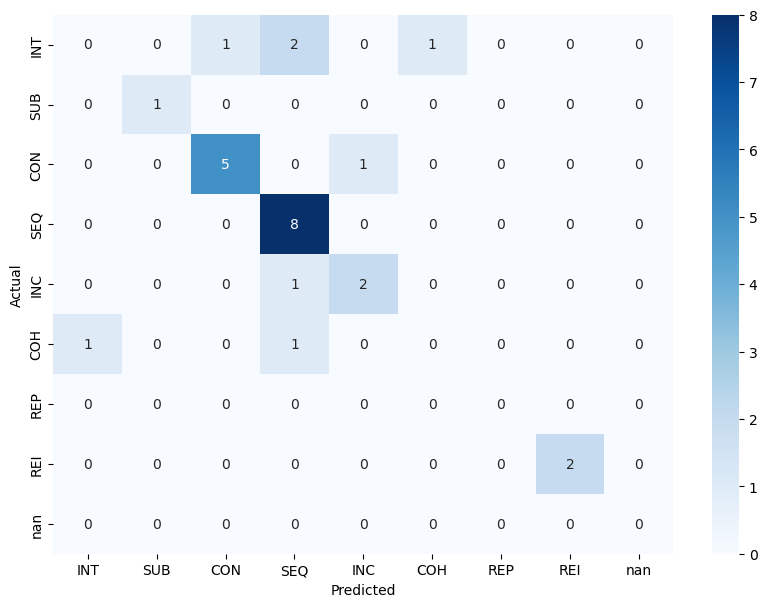

------ Experiment Results ------
accuracy: {'INT': 0.0, 'SUB': 1.0, 'CON': 0.8333333333333334, 'SEQ': 1.0, 'INC': 0.6666666666666666, 'COH': 0.0, 'REP': nan, 'REI': 1.0}
recall: {'INT': 0.0, 'SUB': 1.0, 'CON': 0.8333333333333334, 'SEQ': 1.0, 'INC': 0.6666666666666666, 'COH': 0.0, 'REP': nan, 'REI': 1.0}
precision: {'INT': 0.0, 'SUB': 1.0, 'CON': 0.8333333333333334, 'SEQ': 0.6666666666666666, 'INC': 0.6666666666666666, 'COH': 0.0, 'REP': nan, 'REI': 1.0}
mean_accuracy: 0.6429
mean_recall: 0.6429
mean_precision: 0.5952
--------------------------------


In [7]:
ex.eval_exp(df_results, outpath_exp, seq_classes)